<a href="https://colab.research.google.com/github/jae-gyeong/deep-learning/blob/master/20190920mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 헬퍼(helper) 라이브러리를 임포트
import numpy as np
import matplotlib.pyplot as plt

# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation


# 1. 데이터 셋 설정하기

In [0]:
(x_train, y_label), (x_test, yy_label) = mnist.load_data()

In [0]:
label_name = ['1', '2', '3', '4', '5',
               '6', '7', '8', '9', '0']

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

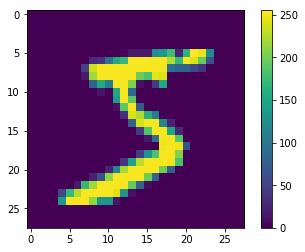

In [0]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

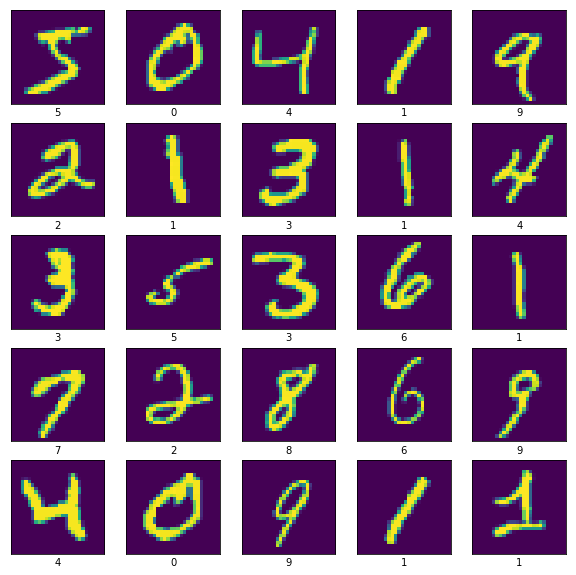

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [0]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0  # 입력 28 * 28 = 784 
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

In [0]:
x_test[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
y_label = np_utils.to_categorical(y_label)
yy_label = np_utils.to_categorical(yy_label)

In [0]:
y_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
val_image = x_train[50000:]        #60000개인거 50000으로 자른거
val_label = y_label[50000:]
tx_train = x_train[:50000]
y_label = y_label[:50000]

In [0]:
val_image.shape

(10000, 784)

In [0]:
tr_rand= np.random.choice(50000, 700)
val_rand = np.random.choice(10000, 300)

In [0]:
x_train = x_train[tr_rand]
y_label = y_label[tr_rand]
val_image = val_image[val_rand]
val_label= val_label[val_rand]

In [0]:
"""
a=['a','b','c']
n=[1,2,3]
t=[4,5]
x=np.array([a,n,t])
"""


"\na=['a','b','c']\nn=[1,2,3]\nt=[4,5]\nx=np.array([a,n,t])\n"

# 2. 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation= 'relu'))
model.add(Dense(64,  activation= 'relu'))
model.add(Dense(units=10, activation= 'softmax'))

# 3.모델 학습과정 설정하기


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습과정 살펴보기

In [0]:
hist = model.fit(x_train, y_label, epochs=100, batch_size=32, validation_data=(val_image, val_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 4s 6ms/step - loss: 2.2989 - acc: 0.1214 - val_loss: 2.2589 - val_acc: 0.1200
Epoch 2/100
700/700 [==============================] - 0s 143us/step - loss: 2.2048 - acc: 0.2086 - val_loss: 2.1777 - val_acc: 0.2500
Epoch 3/100
700/700 [==============================] - 0s 148us/step - loss: 2.1160 - acc: 0.3057 - val_loss: 2.0926 - val_acc: 0.3300
Epoch 4/100
700/700 [==============================] - 0s 152us/step - loss: 2.0199 - acc: 0.4086 - val_loss: 1.9976 - val_acc: 0.4133
Epoch 5/100
700/700 [==============================] - 0s 160us/step - loss: 1.9155 - acc: 0.4843 - val_loss: 1.8949 - val_acc: 0.5000
Epoch 6/100
700/700 [==============================] - 0s 148us/step - loss: 1.8048 - acc: 0.5457 - val_loss: 1.7889 - val_acc: 0.5367
Epoch 7/100
700/700 [==============================

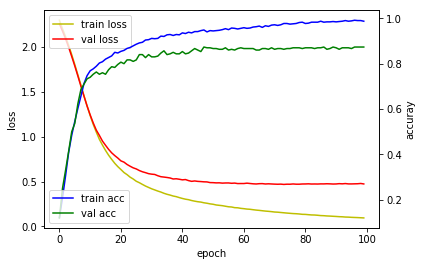

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [0]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

## training loss and acc ##
[2.2989285796029226, 2.204755343028477, 2.115986535208566, 2.0199368115833827, 1.9154755129132952, 1.8047826187951224, 1.6904892826080322, 1.574559839112418, 1.4562856721878052, 1.34332070010049, 1.2359464243480138, 1.13729556117739, 1.0515124985149928, 0.9705358144215175, 0.9067569429533823, 0.8470948362350463, 0.7938640819277082, 0.7472743453298296, 0.7035758352279663, 0.6663038952010019, 0.6342063529150826, 0.600681836605072, 0.5771840534891401, 0.5489472235952105, 0.5283783762795584, 0.5032229617663793, 0.4871048952851977, 0.46806074380874635, 0.449762647151947, 0.4344403660297394, 0.4192455422878265, 0.406761429309845, 0.3939926246234349, 0.38288109455789837, 0.36912765860557556, 0.3579559862613678, 0.34924919486045836, 0.3386217715059008, 0.3316326298032488, 0.32096567835126605, 0.31145879541124616, 0.3033619953904833, 0.2977479656253542, 0.28847151909555707, 0.28129472851753234, 0.27519202411174776, 0.2710341036319733, 0.26322450586727686, 0.258115899

# 6.모델 평가하기

In [0]:
loss_and_acc = model.evaluate(x_test, yy_label, batch_size=32)
print('## evaluation  ##')
print(loss_and_acc)

10000/10000 [==============================] - 1s 51us/step
## evaluation  ##
[0.46168387744426725, 0.862]


In [0]:
xhat = x_test
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[1.3767624e-04 1.3499001e-08 2.0023341e-05 ... 9.9924612e-01
  1.3708449e-05 2.3635093e-04]
 [3.3278670e-03 3.7662270e-03 9.5987701e-01 ... 1.0634448e-06
  3.0318352e-03 1.1337424e-06]
 [1.7716017e-04 9.8514163e-01 7.8010298e-03 ... 7.5558305e-04
  2.7309835e-03 4.4984312e-04]
 ...
 [4.8202077e-07 2.9622149e-06 5.7441153e-05 ... 8.3188526e-04
  1.4870775e-02 3.8083673e-01]
 [3.1284145e-03 2.7501772e-03 1.3424613e-04 ... 7.4679859e-04
  8.4795125e-02 4.1932594e-03]
 [5.8833561e-05 2.6320202e-05 2.0407543e-03 ... 2.4707434e-11
  2.5715300e-07 1.1005076e-06]]


In [0]:
x_test.shape

(10000, 784)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



#plt_row = 10
#plt_col = 10


i = 0


plt.figure(figsize=(10,10))
for i in range(25):    
    if np.argmax(x_test[i]) == np.argmax(yhat[i]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False) 
        plt.imshow(te_image[i].reshape(28, 28))
        plt.xlabel('R: ' + str(np.argmax(x_test[i])) + ' P: ' + str(np.argmax(yhat[i])))
        i += 1
      

plt.show()

<Figure size 720x720 with 0 Axes>

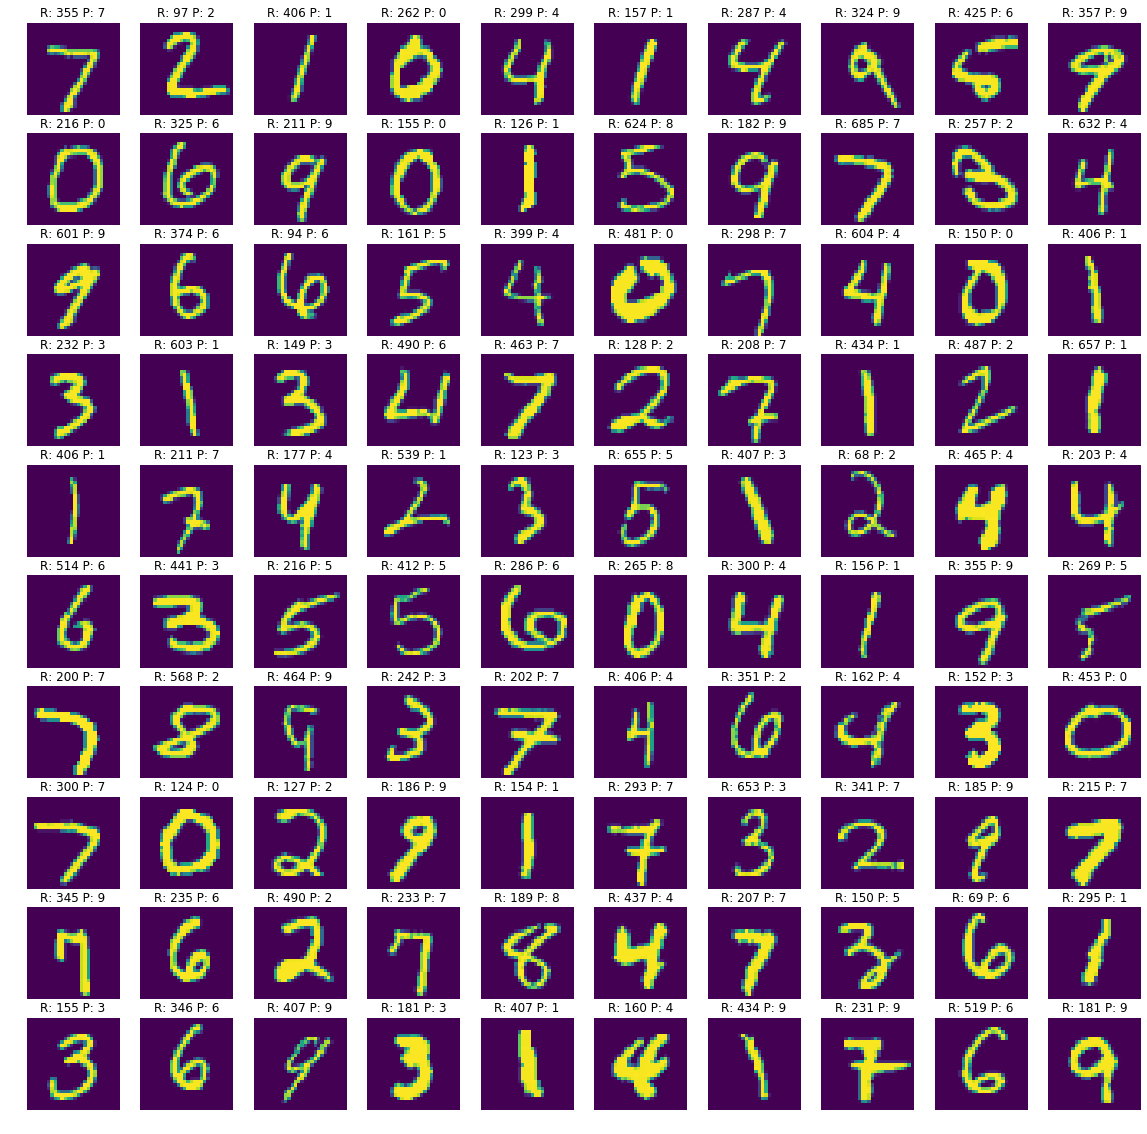

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt



plt_row = 10
plt_col = 10

plt.rcParams["figure.figsize"] = (20,20)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):

    if np.argmax(x_test[i]) == np.argmax(yhat[i]):
        i += 1
      # continue
    
    sub_plt=axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(28, 28))
    sub_plt_title = 'R: ' + str(np.argmax(x_test[i])) + ' P: ' + str(np.argmax(yhat[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()